In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
data = pd.read_csv('galaxias_1.csv', 
                   sep=',')

In [3]:
clase=[]
for i in range(0,data.shape[0]):
    if data.elliptical[i]==1:
        clase.append('E')
    elif data.spiral[i]==1:
        clase.append('S')
    elif data.uncertain[i]==1:
        clase.append('I')
data['clase']=clase

In [4]:
data = data.drop_duplicates(subset='objID') #dropeo duplicados utilizando como referencia el id
data.shape #miro con cuantos datos me queda el dataframe

(57681, 15)

In [5]:
data = data.set_index('objID')
data

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,E
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,I
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,I


In [6]:
data.loc[(data.modelMag_u >24), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g >24), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r >24), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i >24), 'modelMag_i'] = np.nan 
data.loc[(data.Color >24), 'Color'] = np.nan 
data.loc[(data.modelMag_z >24), 'modelMag_z'] = np.nan 
#data.loc[(data.petroR90_r >70000), 'petroR90_r'] = np.nan 
data.loc[(data.petroR90_r <0), 'petroR90_r'] = np.nan 
data.loc[(data.petroR90_r >30), 'petroR90_r'] = np.nan 

In [7]:
data.loc[(data.modelMag_u <0), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g <0), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r <0), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i <0), 'modelMag_i'] = np.nan 
data.loc[(data.Color <-100), 'Color'] = np.nan 
data.loc[(data.modelMag_z <0), 'modelMag_z'] = np.nan 
data.loc[(data.petroR90_r >70000), 'petroR90_r'] = np.nan 

In [8]:
relevant_columns =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
data=data.dropna(subset=relevant_columns, thresh=2)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

In [10]:
relevant_columns =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
columns_to_use = relevant_columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
data[columns_to_use] = scaler.fit_transform(data[columns_to_use])

In [11]:
data_imputada =data.copy(deep=True)

In [12]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
data_imputada[columns_to_use] = imputer.fit_transform(
    data_imputada[columns_to_use]
)

C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
df1 = data_imputada.copy()
df1 = df1.reset_index()
cols = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z',
       'Color']
Q1 = df1.quantile(0.25,numeric_only=True)
Q3 = df1.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1

df1 = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) |(df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()
df1

C:\Users\joaqu\AppData\Local\Temp\ipykernel_8684\3168546568.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) |(df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()
C:\Users\joaqu\AppData\Local\Temp\ipykernel_8684\3168546568.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) |(df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()


,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
0,"1,23765119242489E+018",116.519097,39.886407,-0.626285,-0.230283,-0.021429,0.016404,0.066812,-0.184729,0.650743,0.967970,0,1,0,S
1,"1,23765149575578E+018",116.451900,41.421270,-0.238973,-0.705060,-0.910694,-0.959933,-0.994430,0.110186,0.496581,-1.265907,0,0,1,I
2,"1,23767370611537E+018",115.946713,41.918877,0.247151,0.480569,0.615386,0.633918,0.747550,0.479124,-1.365624,0.741547,0,0,1,I
3,"1,2376737066523E+018",116.051943,42.287231,3.265837,2.888714,3.000560,3.853693,2.586798,-1.762634,0.370253,0.294518,0,0,1,I
4,"1,23765127349266E+018",117.287392,43.434782,0.910401,1.070410,1.078621,1.086956,1.070537,0.753989,0.776699,0.532571,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,"1,23766556715083E+018",231.130092,18.628772,-0.025759,-0.344169,-0.522901,-0.569833,-0.605410,0.174632,-0.790905,-0.898114,1,0,0,E
57677,"1,23765495320163E+018",245.132716,49.797424,-0.310360,0.104724,0.325093,0.407550,0.443228,-0.042212,0.568841,1.097624,0,0,1,I
57678,"1,23765494945271E+018",245.038742,50.552353,1.409196,0.811635,0.474296,0.346840,0.229690,-1.307988,1.485920,-1.359366,0,0,1,I
57679,"1,23765153764514E+018",219.313588,62.338577,0.469674,0.785955,0.929484,0.981116,1.030863,-0.969312,0.105174,0.960360,0,0,1,I


In [14]:
from sklearn.decomposition import PCA

In [15]:
features = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z','Color']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df1[features])
pca = PCA(n_components=3)
df_to_pca=df1[features].copy() 
pca_features = pca.fit_transform(df_to_pca)
 
print('Shape before PCA: ', df_to_pca.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (56913, 8)
Shape after PCA:  (56913, 3)


In [17]:
target_names = {
    0:'S',
    1:'I', 
    2:'E'
}
 
pca_df['target'] = df1['clase']

 
pca_df

,PC1,PC2,PC3,target
0,-0.083986,-0.130058,-1.298819,S
1,-1.887157,1.250808,0.481688,I
2,0.974248,-1.670398,0.419185,I
3,7.056960,0.385946,0.972061,I
4,2.056495,0.079588,-0.471512,I
...,...,...,...,...
56908,-1.210995,-0.002419,1.109209,S
56909,0.627265,-0.323043,-1.218041,S
56910,1.544009,2.389997,0.696580,I
56911,2.184183,-0.392293,-0.476299,I


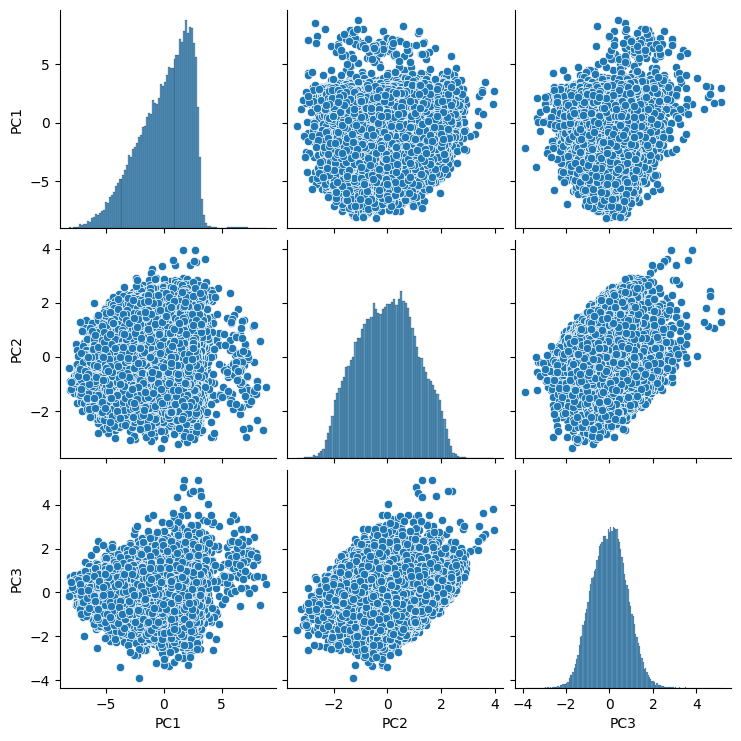

In [18]:
sns.pairplot(data=pca_df)